In [58]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy
import scipy
import math
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [3]:
n_cpus = 4

In [61]:
N_report_len = 180
end_dtm = dtm.datetime(2022,6,20)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#partition='serc'
partition=None
group=None
s_user=None
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file: {sacct_h5_file}')
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=1,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** dates: 2021-12-22 - 2022-06-20
*** sacct_h5_file: sacct_data/sacct_pNONE_gNONE_uNone_20211222_20220620.h5
*** Fetching SACCT data directly
***  2021-12-22 00:00:00+00:00 <class 'datetime.datetime'> 2022-06-20 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --delimiter="|" 
** DEBUG: sacct_str:: sacct  --delimiter="|"  -p --allusers --starttime=2021-12-22T00:00:00 --endtime=2022-06-20T00:00:00 --format=User,Group,GID,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTimeRaw,Suspended,ReqTRES,AllocTRES 
*** DEBUG: sacct_str:  sacct  --delimiter="|"  -p --allusers --starttime=2021-12-22T00:00:00 --endtime=2022-01-01T00:00:00 --format=User,Group,GID,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTimeRaw,Suspended,ReqTRES,AllocTRES 
*** DEBUG: sacct_str:  sacct  --delimiter="|"  -p

*** DEBUG: len(working_data[index]), len(unique(working_data[index])): 5570956, 5570956
** calc_summary:: ks: [      0  100002  200001  300001  400000  500002  600002  700001  800000
  900001 1000000 1100000 1200000 1300002 1400002 1500002 1600002 1700001
 1800002 1900000 2000001 2100002 2200000 2300001 2400000 2500002 2600001
 2700000 2800000 2900000 3000000 3100002 3200001 3300002 3400000 3500001
 3600002 3700002 3800000 3900000 4000000 4100000 4200000 4300002 4400000
 4500000 4600042 4700002 4800002 4900000 5000001 5100001 5200000 5300002
 5400001 5500000 5570957]
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2435: RuntimeWarning: All-NaN slice encountered
  numpy.nanmax(sub_data['NTasks']).astype(int)


*** computing jobs_summary func on 1 cpu
Starting jobs_summary...


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2435: RuntimeWarning: All-NaN slice encountered
  numpy.nanmax(sub_data['NTasks']).astype(int)


** DEBUG: jobs_summary.shape = (33327,)
** DEBUG: jobs_summary.shape = (33309,)
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (32608,)


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2435: RuntimeWarning: All-NaN slice encountered
  numpy.nanmax(sub_data['NTasks']).astype(int)


Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (33093,)
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2435: RuntimeWarning: All-NaN slice encountered
  numpy.nanmax(sub_data['NTasks']).astype(int)


Starting jobs_summary...
** DEBUG: jobs_summary.shape = (33270,)
** DEBUG: jobs_summary.shape = (32891,)
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (32897,)
Starting jobs_summary...
** DEBUG: jobs_summary.shape = (33285,)
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
** DEBUG: jobs_summary.shape = (33159,)
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (33283,)
Starting jobs_summary...
** DEBUG: jobs_summary.shape = (33282,)
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
** DEBUG: jobs_summary.shape = (33022,)
*** computing jobs_summary func on 1 cpu
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (33334,)
Starting jobs_summary...
*** computing jobs_summary func on 1 cpu
** DEBUG: jobs_summary.shape = (33325,)
Starti

*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)

*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)
*** DEBUG: shape(output)=(5000,), shape(r_nj)=(5000,), shape(r_ncpu):(5000,)

In [98]:
cpuh_bin = 1.
cpu_hrs_jobs = SACCT_obj.get_cpu_hours_layer_cake(layer_field='Partition', verbose=True, bin_size=cpuh_bin)

***  {'clab': {}, 'temp': {}, 'ere': {}, 'sep': {}, 'tgp': {}, 'twohour': {}, 'gpu': {}, 'cees': {}, 'suprib': {}, 'schroeder': {}, 'beroza': {}}
*** ky: clab // b'clab'
*** ky: temp // b'temp'
*** ky: ere // b'ere'
*** ky: sep // b'sep'
*** ky: tgp // b'tgp'
*** ky: twohour // b'twohour'
*** ky: gpu // b'gpu'
*** ky: cees // b'cees'
*** ky: suprib // b'suprib'
*** ky: schroeder // b'schroeder'
*** ky: beroza // b'beroza'


In [99]:
cpu_hrs_jobs.keys()

dict_keys(['clab', 'temp', 'ere', 'sep', 'tgp', 'twohour', 'gpu', 'cees', 'suprib', 'schroeder', 'beroza'])

In [100]:
print('** ', cpu_hrs_jobs['sep'])

**  {'cpu_hours': array([(738192.37304398, 738191.37304398, 0.00000000e+00,  1.),
       (738192.39357516, 738191.39357516, 5.99999763e-02,  3.),
       (738192.41410633, 738191.41410633, 5.99999763e-02,  3.), ...,
       (738294.96732885, 738293.96732885, 8.57209505e+02,  6.),
       (738294.98786003, 738293.98786003, 8.80861419e+02, 10.),
       (738295.0083912 , 738294.0083912 , 9.04100000e+02, 10.)],
      dtype=[('time', '>f8'), ('t_start', '>f8'), ('cpu_hours', '>f8'), ('N_jobs', '>f8')]), 'elapsed': 4672.060277777778}


*** clab: sum(dz): 155948.69378656495
*** temp: sum(dz): 6499.871962636405
*** ere: sum(dz): 139424.70501885226
*** sep: sum(dz): 189156.70213249134
*** tgp: sum(dz): 132281.65718579016
*** twohour: sum(dz): 1460543.2192195444
*** gpu: sum(dz): 80241.46317757729
*** cees: sum(dz): 33258.88144117686
*** suprib: sum(dz): 760067.1546677257
*** schroeder: sum(dz): 16468.96830923045
*** beroza: sum(dz): 128503.01685815444
***  [Text(738125.0, 0, '738125'), Text(738150.0, 0, '738150'), Text(738175.0, 0, '738175'), Text(738200.0, 0, '738200'), Text(738225.0, 0, '738225'), Text(738250.0, 0, '738250'), Text(738275.0, 0, '738275'), Text(738300.0, 0, '738300'), Text(738325.0, 0, '738325'), Text(738350.0, 0, '738350')]
***  [738125.0, 738150.0, 738175.0, 738200.0, 738225.0, 738250.0, 738275.0, 738300.0, 738325.0, 738350.0]
clab: 156307.55555555556 cpu-hrs
temp: 74.79333333333332 cpu-hrs
ere: 140918.55861111108 cpu-hrs
sep: 112129.44666666666 cpu-hrs
tgp: 127839.14749999995 cpu-hrs
twohour: 1512891

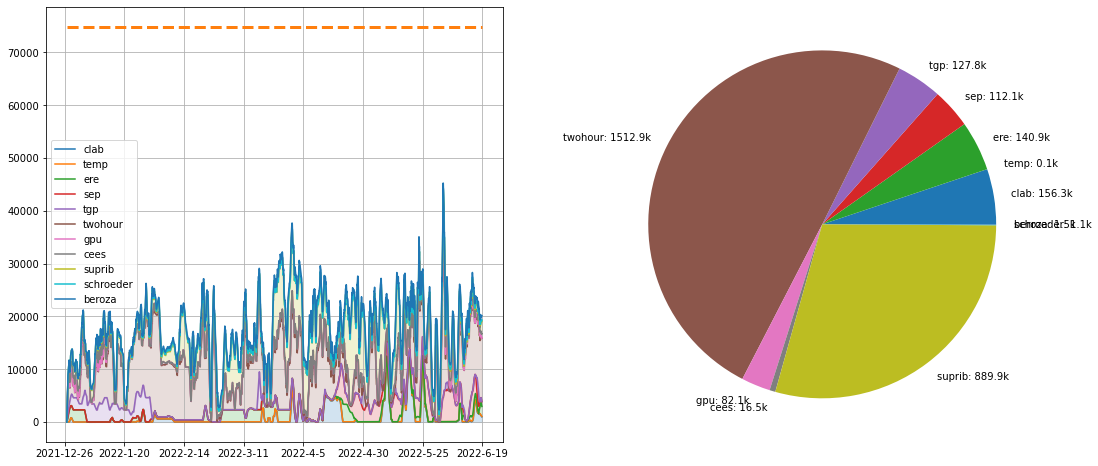

In [106]:
fg = plt.figure(figsize=(18,8))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
ax1.grid()
#
N_max = float(130*24*24)
#
cpuh = next(iter(cpu_hrs_jobs.values()))
z = numpy.zeros(len(cpuh['cpu_hours']))
X = cpuh['cpu_hours']['time']
dX = X[1]-X[0]
#
elapsed = {}

for pt,vls in cpu_hrs_jobs.items():
#     if vls['elapsed'] == 0.:
#         continue
    #print('*** {}: {}'.format(pt, vls.keys()))
    #
    elapsed[pt]=vls['elapsed']
    #
    z_prev = z.copy()
    dz = vls['cpu_hours']['cpu_hours']
    print('*** {}: sum(dz): {}'.format(pt, dX*numpy.sum(dz)/cpuh_bin))
    z += dz
    ln, = ax1.plot(X, z, label=pt)
    clr = ln.get_color()
    ax1.fill_between(X, z_prev, z, color=clr, alpha=.2)
    #
    #ax1.fill_between(X, z_prev, z, alpha=.2)

ax1.plot(X[0::len(X)-1], numpy.ones(2)*N_max, ls='--', lw=3.)
ax1.legend(loc=0)
#
fg.canvas.draw()
lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
         for s in ax1.get_xticklabels()]
print('*** ', [s for s in ax1.get_xticklabels()])
print('*** ', [s.get_position()[0] for s in ax1.get_xticklabels()])
ax1.set_xticklabels(lbls)
fg.canvas.draw()
#
pi_lbls, pi_vls = zip(*list(elapsed.items()))
pi_lbls = [f'{lbl}: {24.*x/1000:.1f}k' for lbl,x in zip(pi_lbls, pi_vls)]
ax2.pie(pi_vls, labels=pi_lbls)
#
for ky,vl in elapsed.items():
    print(f'{ky}: {vl*24.} cpu-hrs')
    

In [87]:
print('** ', numpy.sum([x for x in elapsed.values()])*24.)


**  272990.1022222222


In [56]:
print('*** ', numpy.min(SACCT_obj.jobs_summary['Start']) , numpy.min(SACCT_obj.jobs_summary['End']))

***  738106.1038194444 738120.0227199075


In [ ]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
